## Convolutional Neural Networks (CNN's)
Powerful deep networks that are widely used in image related tasks like - Image Recognition, Segmenation, Computer Vision etc Input to these networks are images!

<img src="./img/cnn2.jpeg"
     alt="pokemon_back.jpg"
     style="width: 400px;" />


### Why CNN
Problem with Multilayer Perceptrons(MLP's)





<img src="./img/cnn.jpeg"
     alt="pokemon_back.jpg"
     style="width: 400px;" />

- **Overfitting** due too many parameters(~millions), while working with medium-large sized images!
- Fail to handle variance in images - translation, rotation, illumination, size etc!
        

### Understanding Convolution
<img src="./img/Convolution_schematic.gif"
     alt="cat.jpg"
     style="width: 400px;" />

## Convolution layer
- Convolution Layers are made up of filters


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
plt.style.use('seaborn')

In [14]:
# Function for displaying the image
def drawImg(img,title='Image'):
    plt.imshow(img,"gray")
    plt.axis('off')
    plt.title(title+str(img.shape))
    plt.show()

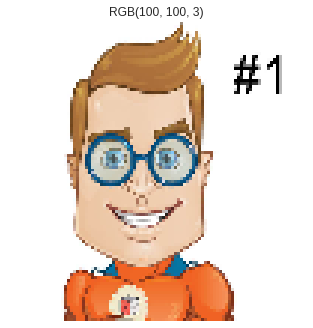

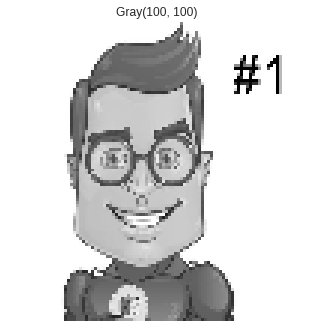

In [15]:
img_ = cv2.imread('./img/cody2.jpg')
img_ = cv2.resize(img_,(100,100))
img_ = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)
drawImg(img_,'RGB')
drawImg(img_gray,'Gray')

In [16]:
def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    F = img_filter.shape[0]
    new_img = np.zeros((W-F+1,H-F+1))
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                    if new_img[row][col] > 255:
                        new_img[row][col] = 255
                    elif new_img[row][col] < 0:
                        new_img[row][col] = 0
    return new_img

#### Extracting Features of image using Filters

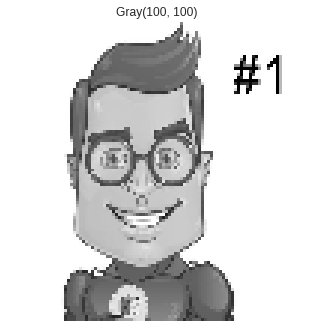

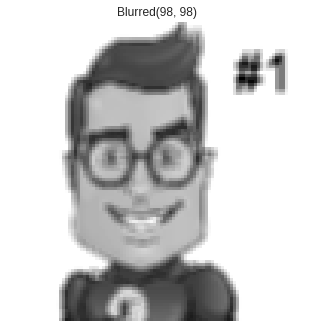

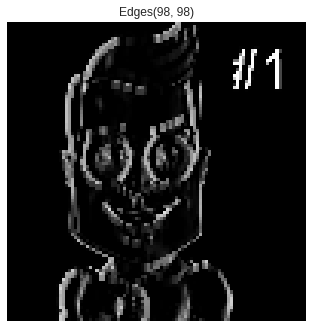

In [17]:
blur_filter = np.ones((3,3))/9.0
output1 = convolution(img_gray,blur_filter)
drawImg(img_gray,'Gray')
drawImg(output1,'Blurred')
edge_filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
output1 = convolution(img_gray,edge_filter)
drawImg(output1,'Edges')

### Convolution Layer
- contains various filters
- each filter extracts different kinds of features and gives 1 activation map
- multiple activation maps are combined by stacking to form output volume
- so CNN layer takes input a volume and produces an output volume of different shape

### Stride
- Filters can have different size as well as movement
- Stride defines how a filter should move across the image
- No of pixels we skip each time is called stride
- In our example we used a stride of (1,1) along W and H
- You can also use a stride of (2,2) in that case the output volume will have less W and H

**Input and Output Sizes**:
(assuming 0 padding)
$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$
$$ n_C = n_{C_{prev}}$$

<img src="./img/Convolution_schematic.gif"
     alt="cat.jpg"
     style="width: 400px;" />


### Padding
- Convolution operation we have seen reduces "H" and "W" of original image
- But sometimes we want the output image to have same size as input image
- So we can achieve this by adding 0 value pixels(neurons) outside the original image
- This is called Padding

**Input and Output Sizes after Convolution**:
(with padding)



$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$


**Padding example**

<img src="./img/cody_pad.jpg"
     alt="cat.jpg"
     style="width: 400px;" />

(100, 100, 3)


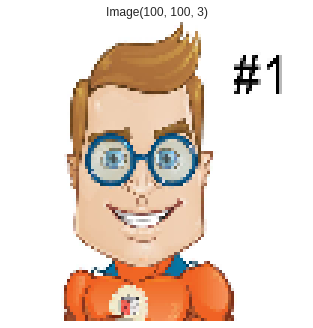

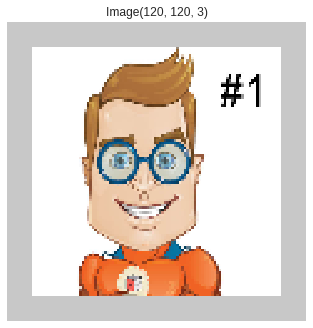

In [25]:
print(img_.shape)
drawImg(img_)
pad_img = np.pad(img_,((10,10),(10,10),(0,0)),'constant',constant_values=200)
drawImg(pad_img)

## Pooling Layers
- Pooling is performed after Convolution Operation
- Two types of pooling layer - Average Pooling and Max Pooling

- **Max-pooling layer**: slides an ($f, f$) window over the input and stores the max value of the window in the output.

- **Average-pooling layer**: slides an ($f, f$) window over the input and stores the average value of the window in the output.

- It helps to reduce computation by discarding 75% of the neurons(assuming 2X2 filters with stride of 2)
- Makes feature detectors more robust
- No parameters for learning, only hyperparameters such as filter size and type of pooling.



<img src="./img/mp.png"
     alt="cat.jpg"
     style="width: 400px;" />


### Implement Pooling Operation


## General CNN Architecture

<img src="./img/arch.png"
     alt="cat.jpg"
     style="width: 600px;" />

[Conv Layers--> ReLu--->Pooling] --> FC -->Softmax
